In [154]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import scipy


np.set_printoptions(suppress=True)

# Wstępna analiza danych


Wczytujemy dane

In [155]:
cards = pd.read_csv('karty-hearthstone.csv')

Podstawowe statystyki opisowe (średnia, mediana, kwartyle, minimum, maksimum, odchylenie standardowe)

In [156]:
cards.describe()

,cost,attack,health
count,2167.000000,1257.000000,1367.000000
mean,3.023535,3.587908,8.321141
std,2.557898,3.281697,13.827319
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000
50%,3.000000,3.000000,4.000000
75%,4.000000,5.000000,7.000000
max,25.000000,30.000000,200.000000


Wypelnianie pustych pól

In [157]:
cards["cost"].fillna(0, inplace = True)
cards["attack"].fillna(0, inplace = True)
cards["health"].fillna(0, inplace = True)

cards["rarity"].fillna('No rarity', inplace = True)
cards["race"].fillna('No race', inplace = True)
cards["playerClass"].fillna('No class', inplace = True)
cards["set"].fillna('No set', inplace = True)

Wyświetlenie pierwszych wierszy

In [158]:
cards.head()

,card_id,playerClass,type,name,set,cost,attack,health,rarity,race
0,TB_CoOpv3_Boss_NewClasses,NEUTRAL,MINION,Nefarian,TB,10.0,0.0,200.0,LEGENDARY,DRAGON
1,TB_CoOpv3_Boss,NEUTRAL,MINION,Nefarian,TB,10.0,0.0,200.0,LEGENDARY,DRAGON
2,LOEA04_01h,NEUTRAL,HERO,Temple Escape,LOE,0.0,0.0,100.0,No rarity,No race
3,LOEA04_01,NEUTRAL,HERO,Temple Escape,LOE,0.0,0.0,100.0,No rarity,No race
4,NAX6_01H,NEUTRAL,HERO,Loatheb,NAXX,0.0,0.0,99.0,No rarity,No race


Usuwamy powtórki kart

In [159]:
cards.drop_duplicates(subset='name', keep='first', inplace=False)

,card_id,playerClass,type,name,set,cost,attack,health,rarity,race
0,TB_CoOpv3_Boss_NewClasses,NEUTRAL,MINION,Nefarian,TB,10.0,0.0,200.0,LEGENDARY,DRAGON
2,LOEA04_01h,NEUTRAL,HERO,Temple Escape,LOE,0.0,0.0,100.0,No rarity,No race
4,NAX6_01H,NEUTRAL,HERO,Loatheb,NAXX,0.0,0.0,99.0,No rarity,No race
5,TB_CoOp_Mechazod_OLD,NEUTRAL,MINION,Gearmaster Mechazod,TB,10.0,2.0,95.0,LEGENDARY,No race
6,TB_CoOp_Mechazod2,NEUTRAL,MINION,Overloaded Mechazod,TB,10.0,9.0,80.0,LEGENDARY,No race
8,LOEA07_02,NEUTRAL,HERO,Mine Shaft,LOE,0.0,0.0,80.0,No rarity,No race
11,KARA_00_01H,NEUTRAL,HERO,Prince Malchezaar,KARA,0.0,0.0,60.0,No rarity,No race
12,BRMA12_1H,NEUTRAL,HERO,Chromaggus,BRM,0.0,0.0,60.0,No rarity,No race
13,TB_KTRAF_H_2,NEUTRAL,HERO,Rafaam,TB,0.0,0.0,60.0,FREE,No race
14,TBA01_1,NEUTRAL,HERO,Ragnaros the Firelord,TB,0.0,0.0,60.0,No rarity,No race


Wyrzucamy z bazy wrzystkie karty typu 'Hero', 'Hero Power' oraz karty z setu 'TB'

In [160]:
indexNames = cards[ cards['type'] == 'HERO' ].index
cards.drop(indexNames , inplace=True) 

indexNames = cards[ cards['set'] == 'TB' ].index
cards.drop(indexNames , inplace=True)

indexNames = cards[ cards['playerClass'] == 'DREAM' ].index
cards.drop(indexNames , inplace=True) 

indexNames = cards[ cards['type'] == 'HERO_POWER' ].index
cards.drop(indexNames , inplace=True) 

In [161]:
print (cards.rarity.unique())
print (cards.playerClass.unique())
print (cards.set.unique())
print (cards.type.unique())

['No rarity' 'EPIC' 'LEGENDARY' 'COMMON' 'RARE' 'FREE']
['NEUTRAL' 'WARLOCK' 'SHAMAN' 'WARRIOR' 'HUNTER' 'DRUID' 'PALADIN' 'ROGUE'
 'MAGE' 'PRIEST' 'No class']
['GANGS' 'OG' 'EXPERT1' 'LOE' 'NAXX' 'CREDITS' 'TGT' 'MISSIONS' 'KARA'
 'CHEAT' 'GVG' 'BRM' 'CORE' 'PROMO' 'REWARD' 'No set']
['MINION' nan 'SPELL' 'WEAPON' 'ENCHANTMENT']


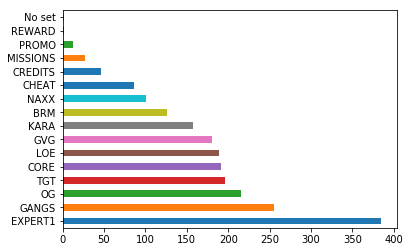

In [162]:
cards['set'].value_counts().plot(kind='barh')
plt.show()

Usuwamy sety które nie są dostępne dla graczy

In [163]:
cards = cards[~cards['set'].isin(['Hero Skins', 'Debug', 'Missions', 'Credits','No set','REWARD','Cheat'])]

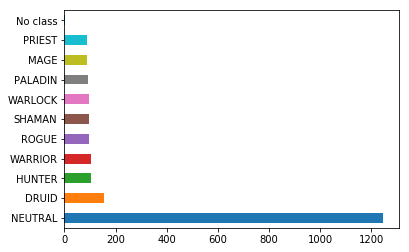

In [164]:
cards['playerClass'].value_counts().plot(kind='barh')
plt.show()

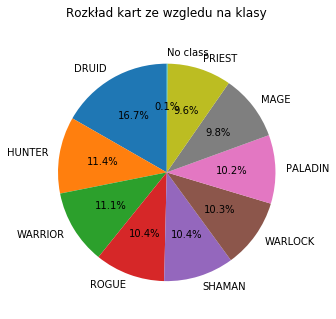

In [165]:
cards_n = cards[cards.playerClass != 'NEUTRAL']
liczba_kwk = cards_n['playerClass'].value_counts()
klasy = liczba_kwk.keys()
liczba_k = liczba_kwk.values


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axes.set_title('Rozkład kart ze wzgledu na klasy', y=1.05)
axes.pie(liczba_k, labels=klasy, autopct='%1.1f%%', startangle=90)
plt.show()

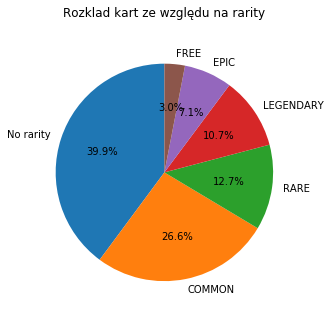

In [166]:
ilosc_r = cards['rarity'].value_counts()
klasy_r = ilosc_r.keys()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axes.set_title(('Rozklad kart ze względu na rarity'), y=1.05)
axes.pie(ilosc_r, labels=klasy_r, autopct='%1.1f%%', startangle=90)
plt.show()

Histogramy

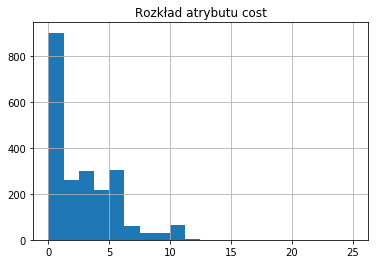

In [167]:
cards['cost'].hist(bins=20)
plt.title('Rozkład atrybutu cost')
plt.show()

Z powyższego histogramu wynika, że najwięcej kart ma wartość rowna 0, duza czesc zawiera sie w przedziale (0;5). Bardzo mala ilosc kart ma cost wiekszy niz 5.

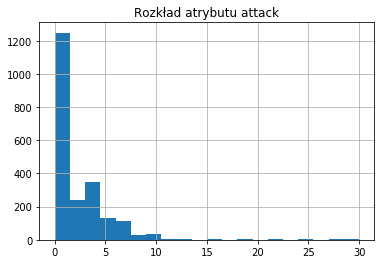

In [168]:
cards['attack'].hist(bins=20)
plt.title('Rozkład atrybutu attack')
plt.show()

Z powyższego histogramu wynika, że najwięcej kart ma wartość 'Attack' rowna 0, duza czesc zawiera sie w przedziale (0;5). Bardzo malo kart ma wartosc powyzej 5

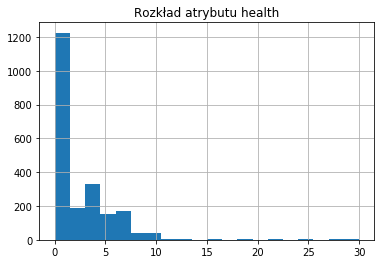

In [169]:
cards['health'].hist(bins=20)
plt.title('Rozkład atrybutu health')
plt.show()

Z powyższego histogramu wynika, że najwięcej kart ma wartość 'Health' rowna  1 i 3, duza czesc zawiera sie w przedziale (0;5) bardzo mala ilosc karta ma wartosc wieksza niz 5.
Ucinamy karty których koszt jest większy niż standardowe 10 many, życie =< 15 i atak =< 15.

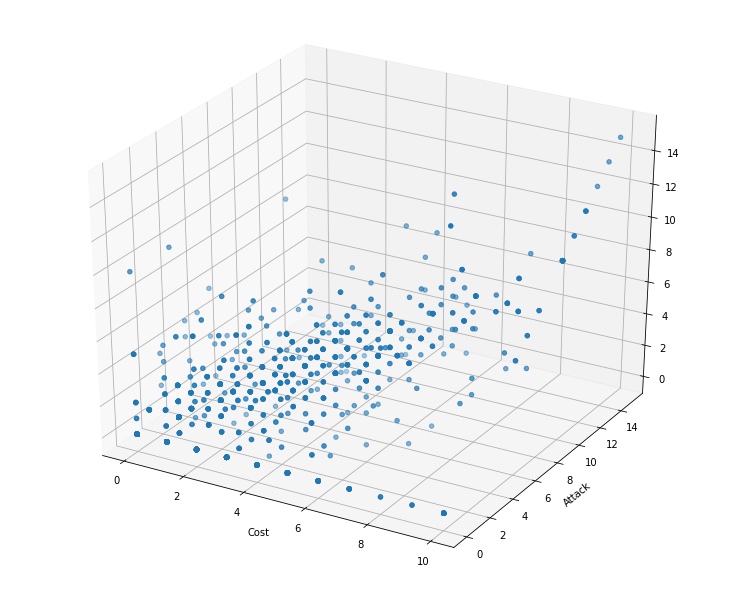

In [170]:
cards = cards[cards['cost'] <= 10]
cards = cards[cards['health'] <= 15]
cards = cards[cards['attack'] <= 15]

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(cards['cost'], cards['attack'], cards['health'])
plt.xlabel('Cost')
plt.ylabel('Attack')

plt.show()
from mpl_toolkits.mplot3d import Axes3D

Punktowy wykres atrybutów cost, attack, health 

Macierz korelacji

In [171]:
cards.corr()

,cost,attack,health
cost,1.000000,0.689368,0.667526
attack,0.689368,1.000000,0.804643
health,0.667526,0.804643,1.000000


Z powyzszej macierzy korelacji wynika, ze zmienne sa dosyc dobrze skorelowane ze soba.

1) Cost i Attack: 0.689368 - korelacja wysoka

2) Cost i Health: 0.667526 - korelacja wysoka

3) Health i Attack: 0.804643 - korelacja bardzo wysoka

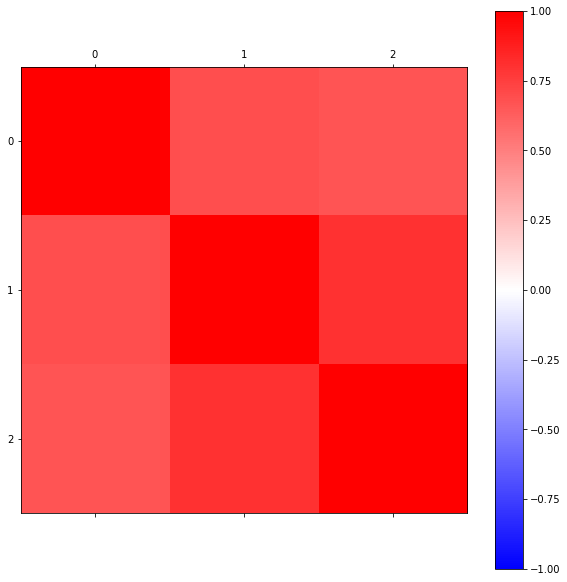

In [172]:
plt.rcParams['figure.figsize'] = (10,10)
plt.matshow(cards.corr(), vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()

Graficzna reprezentacja macierzy korelacji

# Zaleznosci dla zmiennej 'attack':

Text(0, 0.5, 'Attack')

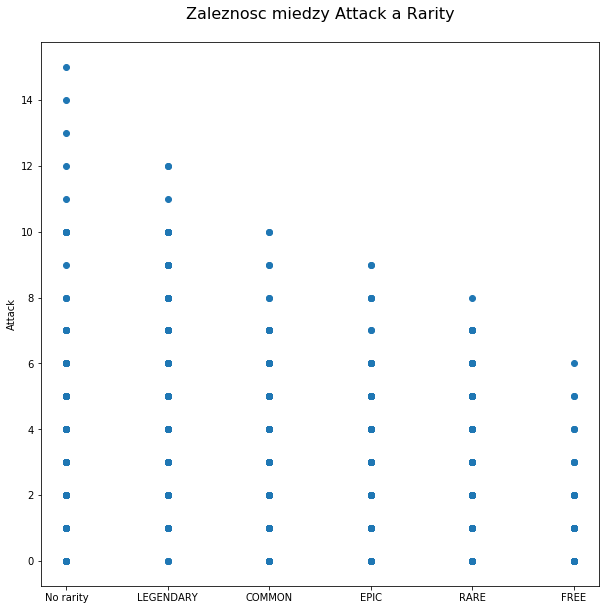

In [173]:
plt.scatter(cards['rarity'], cards['attack'])
plt.title('Zaleznosc miedzy Attack a Rarity\n', size=16)
plt.ylabel('Attack')

Jak wynika z powyzszego wykresu najwyzsze wartosciu ataku osiagaja karty bez okreslonego typu, a nastepnie 'Legendary', 'Common', 'Epic', 'Rare' i 'Free'

Text(0, 0.5, 'Attack')

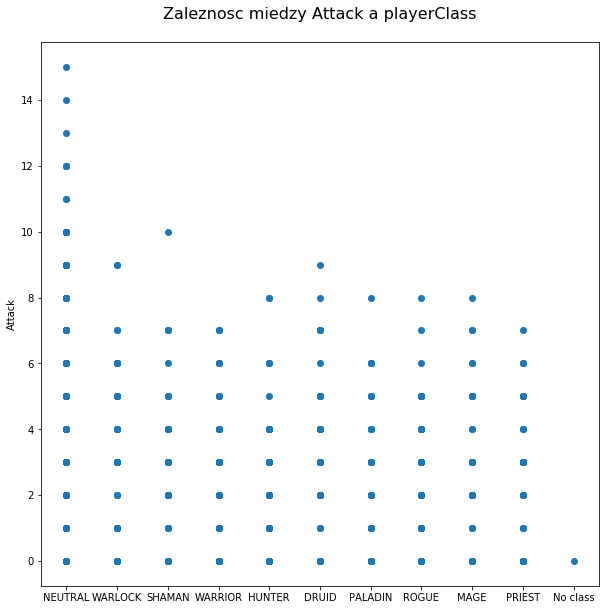

In [174]:
plt.scatter(cards['playerClass'], cards['attack'],)
plt.title('Zaleznosc miedzy Attack a playerClass\n', size=16)
plt.ylabel('Attack')

Najwyzsze wartosci ataku osiagaja karty klasy 'Neutral', dla reszty klas wyniki sa porownywalne 

Text(0, 0.5, 'Attack')

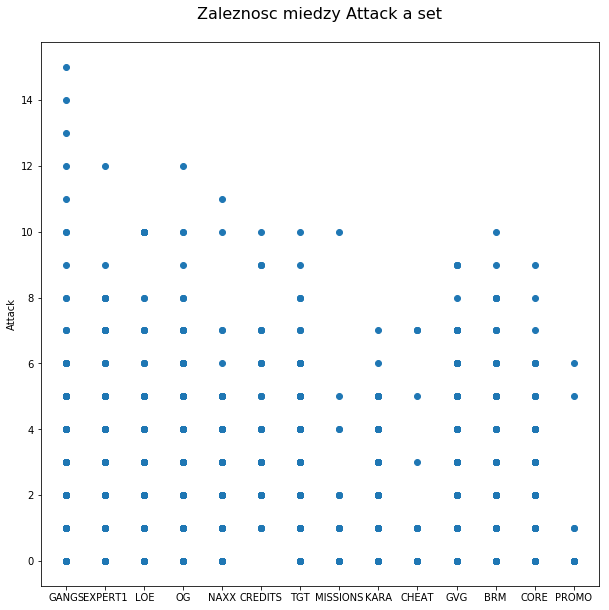

In [175]:
plt.scatter(cards['set'], cards['attack'],)
plt.title('Zaleznosc miedzy Attack a set\n', size=16)
plt.ylabel('Attack')

Najwyzsze wartosci osiagaja karty z setow 'Gangs', najmniejsze z setu 'Promo'.




# Zaleznosci dla zmiennej 'cost'

Text(0, 0.5, 'Cost')

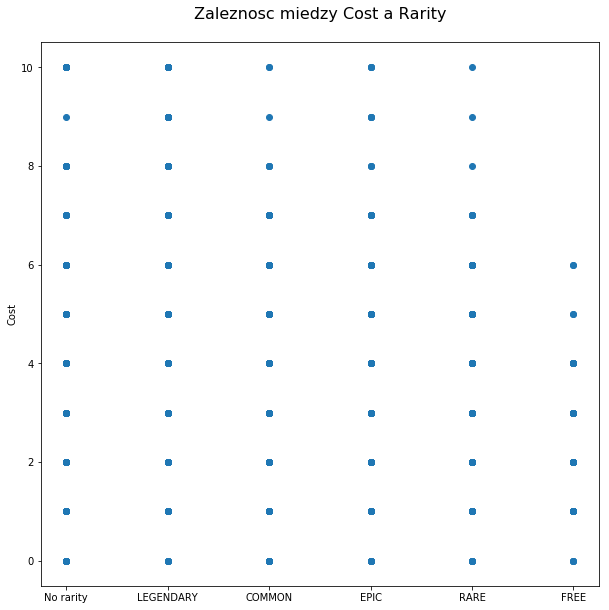

In [176]:
plt.scatter(cards['rarity'], cards['cost'])
plt.title('Zaleznosc miedzy Cost a Rarity\n', size=16)
plt.ylabel('Cost')

Najmniejsze wartosci wystepuja w kartach typu 'Free', w pozostalych sa takie same.

Text(0, 0.5, 'Cost')

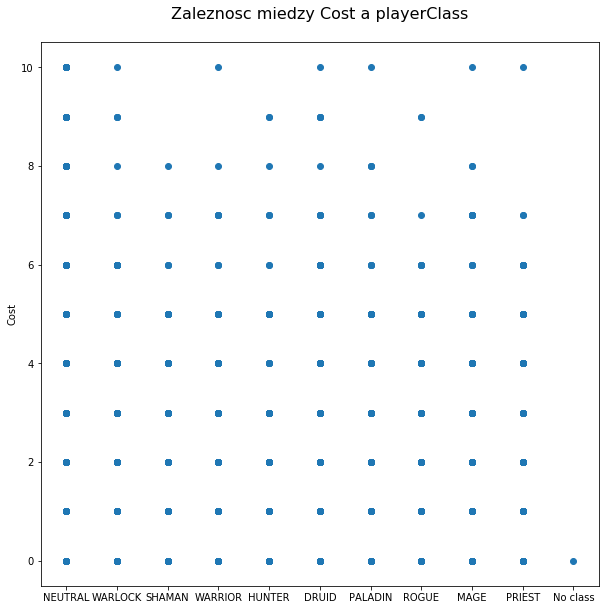

In [177]:
plt.scatter(cards['playerClass'], cards['cost'])
plt.title('Zaleznosc miedzy Cost a playerClass\n', size=16)
plt.ylabel('Cost')

Rozklad wartosci cost jest bardzo podobny we wszystkich klasach.

Text(0, 0.5, 'Cost')

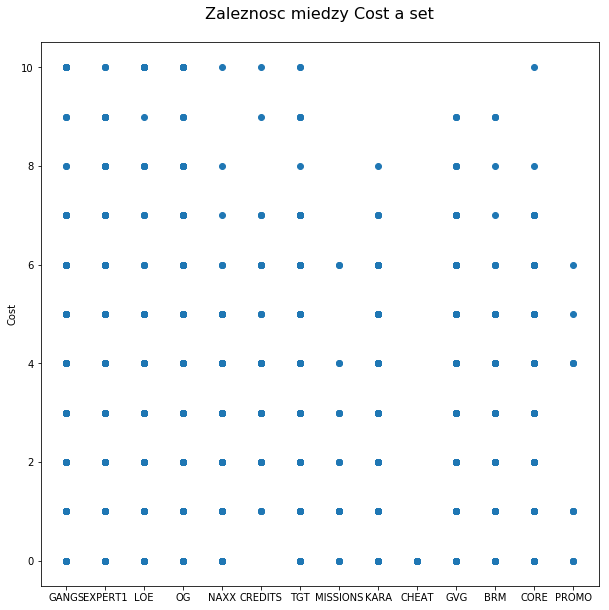

In [178]:
plt.scatter(cards['set'], cards['cost'])
plt.title('Zaleznosc miedzy Cost a set\n', size=16)
plt.ylabel('Cost')

Najwieksze wartosci atrybutu 'cost' osiaga set: 'Expert1' a najmniejsze - 'Reward' i 'Hero_skins'.

# Zaleznosci dla zmiennej 'health'

Text(0, 0.5, 'Health')

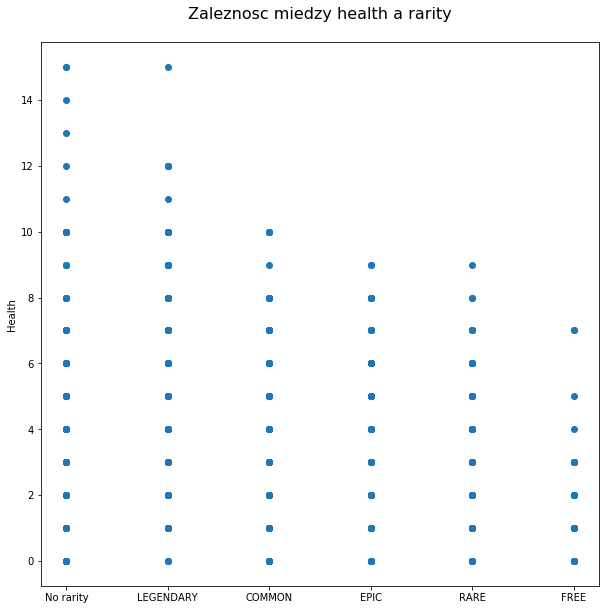

In [179]:
plt.scatter(cards['rarity'], cards['health'])
plt.title('Zaleznosc miedzy health a rarity\n', size=16)
plt.ylabel('Health')

Najwieksze wartosci health maja karty bez okreslonego typu, a nastepnie 'Legendary', 'Common', 'Epic', 'Rare' i 'Free'

Text(0, 0.5, 'Health')

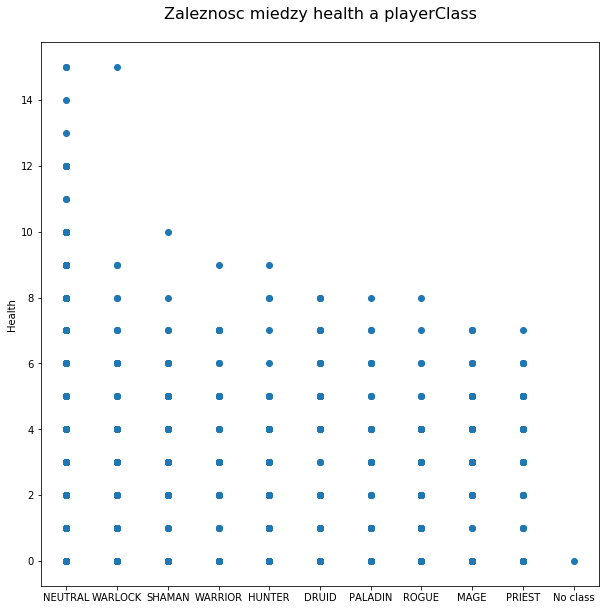

In [180]:
plt.scatter(cards['playerClass'], cards['health'])
plt.title('Zaleznosc miedzy health a playerClass\n', size=16)
plt.ylabel('Health')

Najwyzsze wartosci 'health' wystepuja w kartach klasy 'Neutral', pozostale klasy sa na podobnym poziomie.

Text(0, 0.5, 'Health')

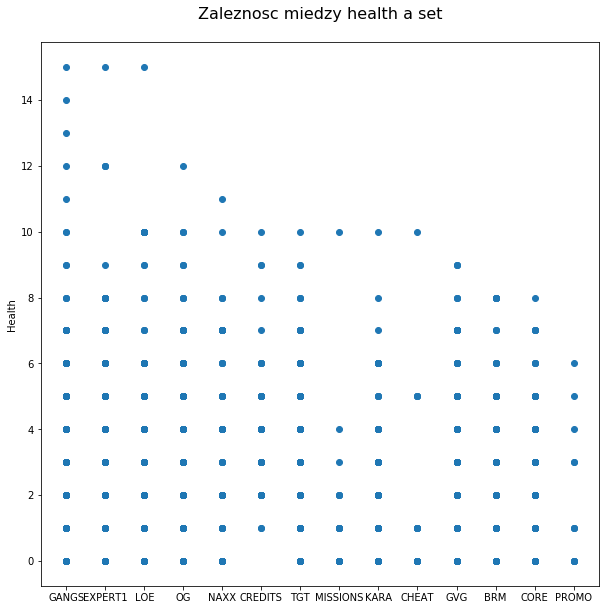

In [181]:
plt.scatter(cards['set'], cards['health'])
plt.title('Zaleznosc miedzy health a set\n', size=16)
plt.ylabel('Health')

Najwieksze wartosci wystepuja w setach 'Gangs', 'Expert1', 'Loe', a najmniejsze w 'Promo'.

Wspolczynnik zmiennosci dla kazdej zmiennej:

In [182]:
print(scipy.stats.variation(cards['cost'], axis=0))
print(scipy.stats.variation(cards['health'], axis=0))
print(scipy.stats.variation(cards['attack'], axis=0))

0.9642642787090469
1.3002046699413052
1.3265525755476062


Zmienna cost = silna zmiennosc

Zmienna health = bardzo silna zaleznosc

Zmienna attack = bardzo silna zaleznosc

# Grupowanie metoda k-srednich

Wyrzucenie danych tekstowych, tak aby byla mozliwosc dokonania analizy klastrow

In [183]:
x_cards = cards.drop(['set','race','rarity','card_id','playerClass','type','name'], axis=1)

In [184]:
x_cards.head()

,cost,attack,health
180,10.0,15.0,15.0
181,9.0,3.0,15.0
182,8.0,6.0,15.0
189,10.0,14.0,14.0
191,10.0,13.0,13.0


Szukanie optymalnej wartosci k:

In [185]:
inertia_scores = []
silhouette_scores = []
calinski_harabaz_scores = []

for i in range(2,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_cards)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(x_cards, kmeans.labels_, metric='euclidean'))
    calinski_harabaz_scores.append(metrics.calinski_harabaz_score(x_cards, kmeans.labels_))

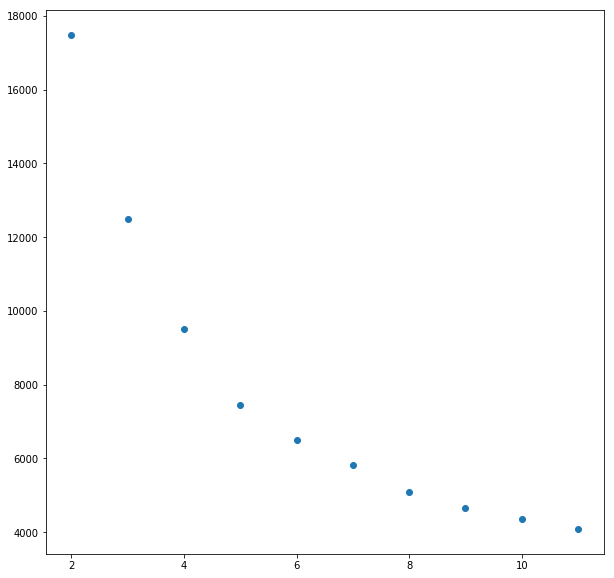

In [186]:
plt.scatter(x=np.arange(2,12), y=inertia_scores)

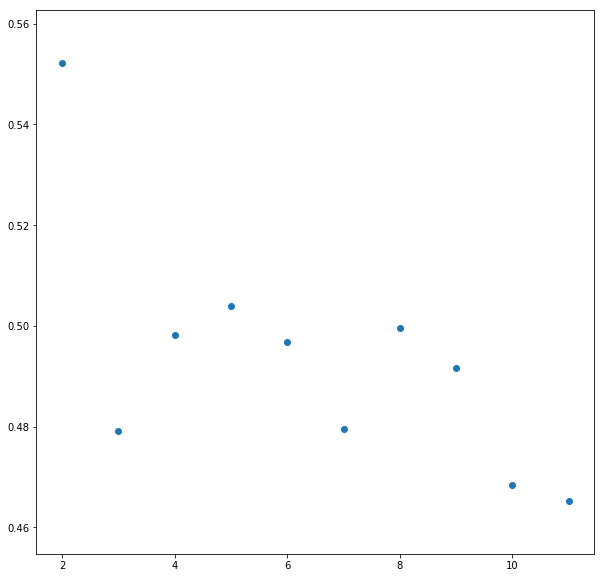

In [187]:
plt.scatter(x=np.arange(2,12), y=silhouette_scores)

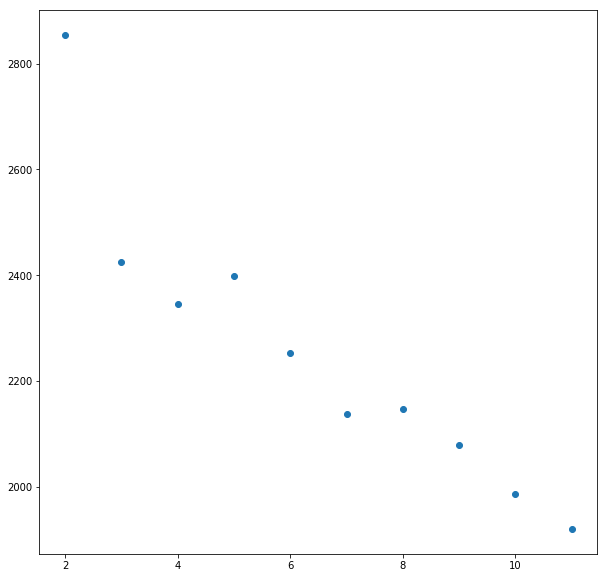

In [188]:
plt.scatter(x=np.arange(2,12), y=calinski_harabaz_scores)

In [189]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_cards)
    Sum_of_squared_distances.append(km.inertia_)

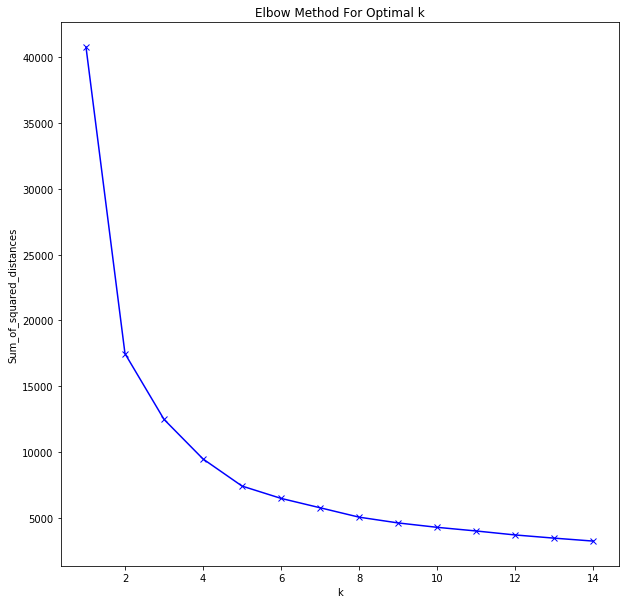

In [190]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Z powyzszej metody lokcia oraz wczesniejszych metod na szukanie optymalnej wartosci k wynika, ze optymalna wartosc k w przypadku naszych danych wynosi 5.

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_cards[x_cards.columns] = scaler.fit_transform(x_cards)



Klastrowanie danych:

In [192]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_cards)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Obliczenie centrow klastrow:

In [193]:
kmeans.cluster_centers_

array([[ 0.97617305,  1.15158132,  1.19617397],
       [ 0.77264015, -0.68557591, -0.75578552],
       [-0.84077401, -0.66625008, -0.68852353],
       [ 2.28052672,  2.62030487,  2.49480257],
       [ 0.02596949,  0.25875887,  0.33395944]])

In [194]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[5.06887052, 4.56198347, 5.16528926],
       [4.55642023, 0.16342412, 0.03501946],
       [0.49420443, 0.20969442, 0.2118019 ],
       [8.35294118, 8.07843137, 8.57843137],
       [2.67647059, 2.42436975, 2.89915966]])

Przecietni przedstawiciele klastrow (dla k = 5):

k1 : attack - 0.49420443, cost - 0.20969442, health - 0.2118019 

k2 : attack - 5.06868132, cost - 4.56318681, health - 5.15384615

k3 : attack - 8.35294118, cost - 8.07843137, health - 8.57843137

k4 : attack - 4.55642023, cost - 0.16342412, health - 0.03501946

k5 : attack - 2.67157895, cost - 2.41894737, health - 2.90315789

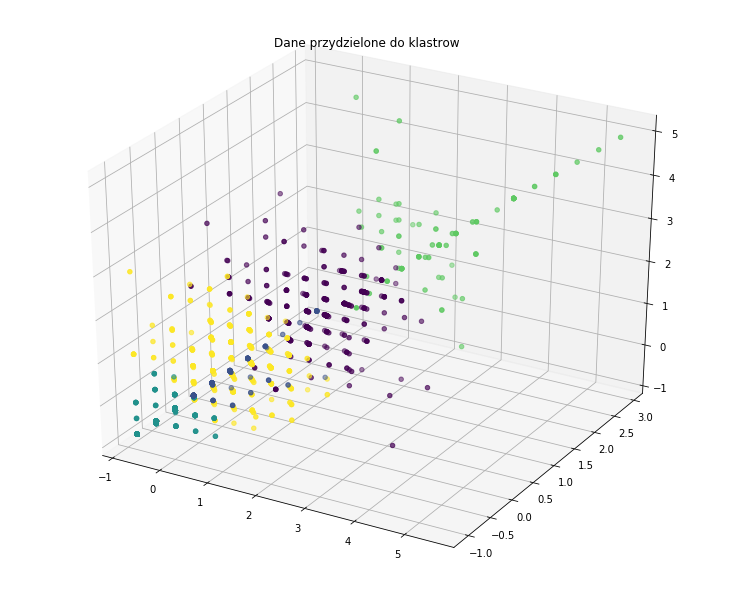

In [195]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    x_cards['attack'],
    x_cards['cost'],
    x_cards['health'],
    c=kmeans.labels_
)
plt.title('Dane przydzielone do klastrow')
plt.show()

# Metoda aglomeracyjna

In [205]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Metoda ward

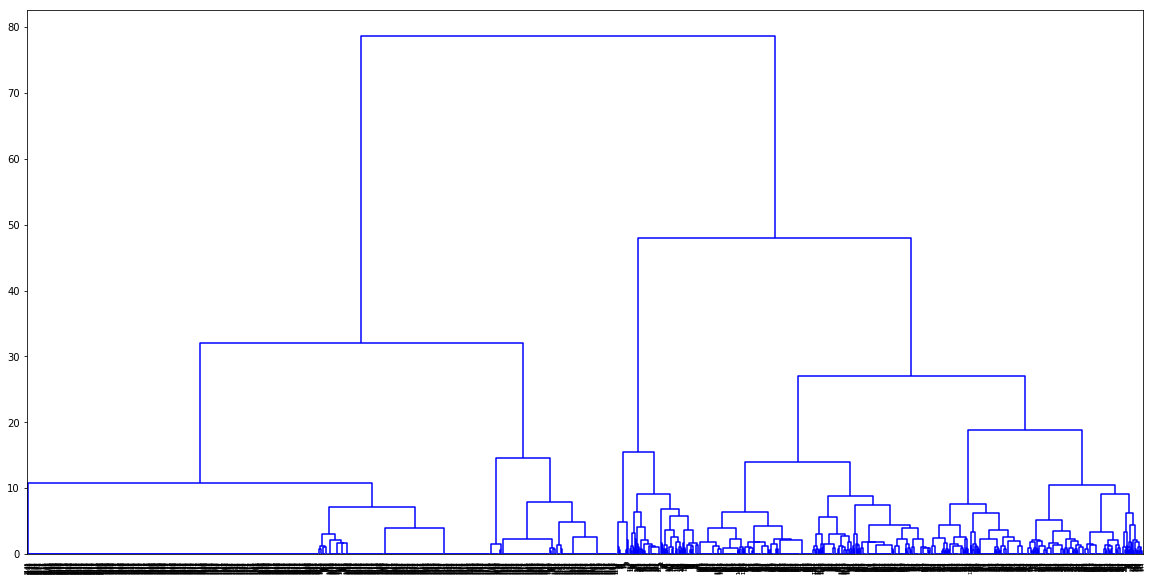

In [206]:
linkage_matrix = linkage(x_cards, 'ward')
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

Metoda median

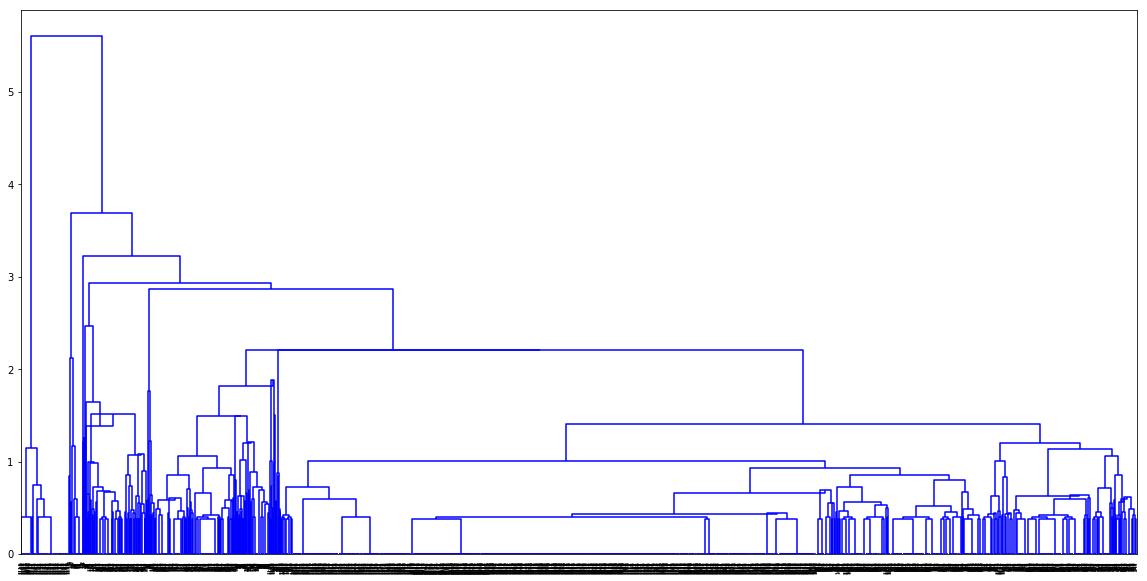

In [207]:
linkage_matrix = linkage(x_cards, 'median')
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

Metoda average

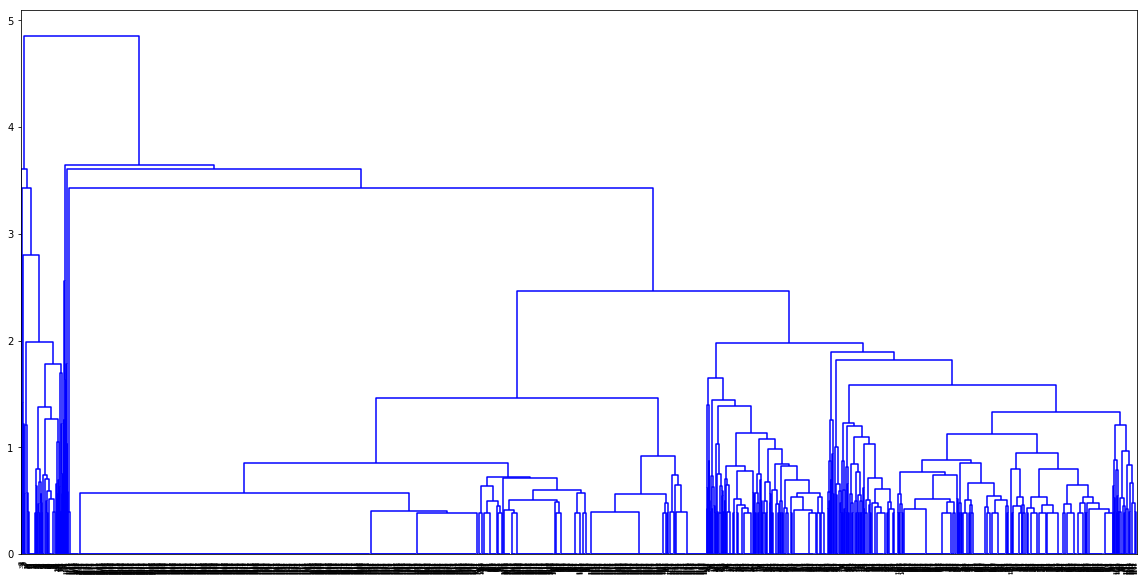

In [208]:
linkage_matrix = linkage(x_cards, 'average')
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

Metoda single

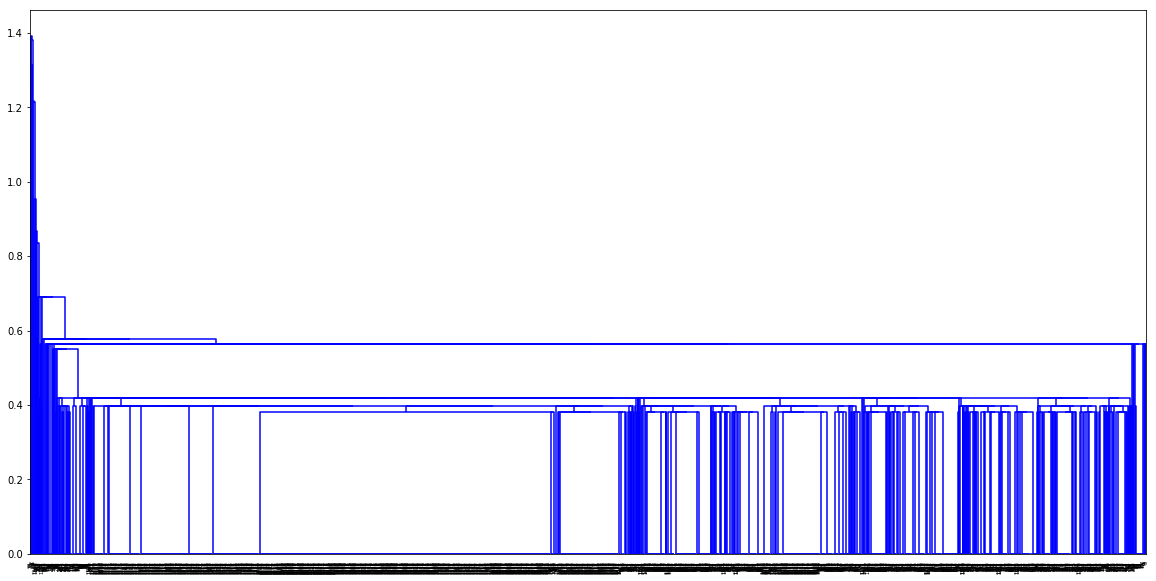

In [209]:
linkage_matrix = linkage(x_cards, 'single')
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

Z powyzej zastosowanych metod laczenia klastrow najlepsza okazala sie metoda ward, na ktorej najwyrazniej mozna wyroznic skupiska danych. Na podstawie dendrogramu powstalego przy uzyciu tej metody wynika, ze odpowiednia ilosc klastrow to k = 6.